# Preliminary Project - Data Analysis and Visualization
**Group Members:**
- Benjamin Francis Abadila
- Angelo Dela Paz
- Carl Mitzchel Padua
- Edjin Jerney Payumo
- Levin Jacob Sta. Cruz

---
## Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2023 Dataset
fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\708551984.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


---
## Data Preprocessing

### Simple Data Inspection

In [3]:
#show all columns on output
pd.set_option('display.max_columns', None)

In [4]:
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

`'TOTDIS'` is the only object datatype although it should also be numerical 

In [5]:
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,1.349645e+04,2.298986e+03,4.626744e+03,387.405021,2.544389e+04,2.398009e+03,6.584374e+03,5.824782e+03,3.672963e+02,3.758046e+02,6.181191e+04,8.169978,27286.062891,16053.257366,14394.006695,6144.197778,1712.811002,4601.016959,7037.525935,2141.598779,4130.657394,711.642792,2217.816260,122.737804,438.272914,1900.274496,1187.452304,79.535181,1279.174387,1983.709162,67.003924,19.450805,1.171387,9.015887e+04,11548.751406,1.017076e+05,4.900740e+03,5.409333e+04,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,6.315285e+03,6.971786e+03,1.581311e+04,7888.639139,1.988345e+03,8.202996e+03,6376.147353,9065.431358,5.097815e+03,6275.710347,4.889744e+03,2.743421e+04,218.148829,1.414477e+05,3.321473e+05,2.431553e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,4.460068e+04,4.009795e+04,2.985207e+04,5000.560669,2.251064e+05,3.531579e+04,3.467995e+04,8.237168e+04,1.672914e+04,1.802239e+04,2.660405e+05,738.982873,12875.671564,13694.003058,10333.798670,6312.403759,1549.350682,4226.019431,5509.888624,2031.424024,6184.097005,1149.474516,2066.748378,518.245413,1170.879435,2127.917027,1353.817982,550.259214,2686.722445,4540.873882,489.885721,226.289097,68.121341,4.494110e+04,19540.102473,5.493516e+04,7.662093e+03,5.933142e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.575241e+04,2.631806e+04,2.123939e+04,8947.522999,9.025928e+03,2.421281e+04,17194.193854,10490.738724,3.698498e+04,13899.963545,2.659590e+04,1.752157e+05

In [6]:
# Identify column that are non-numeric
fies_23.describe(include='O')

,TOTDIS
count,163268
unique,144056
top,
freq,7732


In [7]:
# Convert the TOTDIS column to string for inspection
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Check for null values
null_values_count = fies_23['TOTDIS'].isnull().sum()

# Identify non-numerical entries (including whitespace)
non_numerical_entries = fies_23[~fies_23['TOTDIS'].str.replace('.', '', regex=False).str.isnumeric()]

# Display results
print(f"Number of null values: {null_values_count}")
print(f"Number of non-numerical entries: {len(non_numerical_entries)}")

# Display the non-numerical entries for inspection
print(non_numerical_entries[['TOTDIS']])


Number of null values: 0
Number of non-numerical entries: 7732
             TOTDIS
47648              
47649              
47650              
47651              
47652              
...             ...
148931             
148932             
148933             
148934             
148935             

[7732 rows x 1 columns]


In [8]:
# Strip whitespace from the TOTAL_DISBURSEMENTS column
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify and view rows where TOTAL_DISBURSEMENTS contains only whitespace
whitespace_entries = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Display the rows with whitespace in TOTAL_DISBURSEMENTS
whitespace_entries['TOTDIS']


47648                
47649                
47650                
47651                
47652                
             ...     
148931               
148932               
148933               
148934               
148935               
Name: TOTDIS, Length: 7732, dtype: object

All the non-numeric values of column `'TOTDIS'` are whitespaces, probably caused by an encoding error

In [9]:
# Calculating the Missing Values % Contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)
df_null[df_null > 0] # Show only columns having Missing Values (non-zero)

Series([], dtype: float64)

There are no identified null values except for the empty whitespaces in `'TOTDIS'`

In [10]:
fies_23.shape

(163268, 90)

In [11]:
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [12]:
fies_23

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163263,17,59,163264,5900,3.0,42600,5984,48584,0,0,8700,0,0,0,0,0,4780,300.0,30280,0,11340,0,0,0,0,0,0,0,41620,0,16815.0,8650.0,8969.0,3260.0,1040.0,2030.0,3530.0,2990.0,2360.0,204.0,1560.0,0.0,3744.0,1690.0,450.0,0.0,0.0,0.0,0.0,0,0,57292.0,3800.0,61092.0,4695,21300,0,12000,0,12000,3365,60,9600,2500,1050,260,0,4809,0,1000,600,0,0,49239.0,115984.0,110331.0,110331.0,0,115984.0,326,52.355953,159.710117,2,38661.332031,2,3,4,4,3,17
163264,17,59,163265,5900,7.0,117600,56800,174400,0,0,0,0,0,0,0,0,4290,0.0,0,0,62630,0,0,0,0,0,0,0,62630,0,34916.0,20015.0,24234.0,2091.0,1320.0,1940.0,6150.0,5780.0,3499.0,264.0,2730.0,0.0,1560.0,2470.0,900.0,0.0,0.0,0.0

### Data Cleaning

In [13]:
# Convert TOTDIS to string to check for whitespaces
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify rows where TOTDIS contains only whitespace
whitespace_rows = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Compute the new values for TOTDIS
fies_23.loc[whitespace_rows.index, 'TOTDIS'] = (
    fies_23.loc[whitespace_rows.index, 'TOTEX'] + 
    fies_23.loc[whitespace_rows.index, 'OTHER_DISBURSEMENT']
)

# Convert TOTDIS back to numeric type
fies_23['TOTDIS'] = pd.to_numeric(fies_23['TOTDIS'], errors='coerce')

# Display the updated DataFrame for verification
print(fies_23[['TOTDIS', 'TOTEX', 'OTHER_DISBURSEMENT']].head())

     TOTDIS     TOTEX  OTHER_DISBURSEMENT
0  228942.0  228942.0                   0
1  363677.0  363077.0                 600
2  559186.0  516477.0               42709
3  180438.0  180438.0                   0
4  436962.0  390438.0               46524


In [14]:
# Dropping Unnecessary Columns
cleaned_fies = fies_23.copy()

# Drop Entrepreneurial Activity Component Columns
cleaned_fies.drop(columns=[
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10'
], inplace=True)

# Drop Food Component Columns
cleaned_fies.drop(columns=[
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 
    'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 
    'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 
    'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
    'FOOD_HOME', 'FOOD_OUTSIDE'
], inplace=True)

# Drop Non-Food Component Columns
cleaned_fies.drop(columns=[
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 
    'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 
    'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 
    'OTHER_EXPENDITURE'
], inplace=True)

# Drop Other Unnecessary Columns
cleaned_fies.drop(columns=[
    'WAGES', 'FOOD_ACCOM_SRVC', 'NPCINC', 
    'RPCINC', 'PRPCINC', 'PPCINC', 'RPCINC_NIR', 
    'W_REGN_NIR'
], inplace=True)


In [15]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'EAINC',
       'LOSSES', 'FOOD', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL',
       'OTHER_DISBURSEMENT', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'OTHREC',
       'TOREC', 'RPSU', 'RFACT', 'MEM_RFACT', 'URB', 'PERCAPITA'],
      dtype='object')

In [16]:
# Standardize Column Names
cleaned_fies.rename(
    columns={
        "W_REGN": "REGION",
        "W_PROV": "PROVINCE",
        "SEQ_NO": "FAMILY_ID",
        "RPROV": "PROVINCE_RECODE",
        "FSIZE": "FAMILY_SIZE",
        "NETSHARE": "NET_SHARE",
        "OTHER_SOURCE": "OTHER_INCOME_SOURCE",
        "REGFT": "GIFT_RECEIPTS",
        "EAINC": "ENTREP_INCOME",
        "LOSSES": "ENTREP_LOSS",
        "FOOD": "FOOD_EXPENSES",
        "NFOOD": "NON_FOOD_EXPENSES",
        "TOINC": "TOTAL_INCOME",
        "TOTEX": "TOTAL_EXPENSES",
        "TOTDIS": "TOTAL_DISBURSEMENTS",
        "OTHREC": "OTHER_RECEIPTS",
        "TOREC": "TOTAL_RECEIPTS",
        "RFACT": "FAMILY_WEIGHT",
        "MEM_RFACT": "POPULATION_WEIGHT",
        "URB": "AREA_CLASS",
        "PERCAPITA": "PCAPITA_INCOME",
    },
    inplace=True,
)

In [17]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'PROVINCE_RECODE', 'FAMILY_SIZE',
       'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'ENTREP_LOSS', 'FOOD_EXPENSES', 'ACTRENT', 'IMPUTED_RENT',
       'BIMPUTED_RENT', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'RPSU', 'FAMILY_WEIGHT',
       'POPULATION_WEIGHT', 'AREA_CLASS', 'PCAPITA_INCOME'],
      dtype='object')

In [18]:
cleaned_fies.shape

(163268, 36)

In [19]:
cleaned_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               163268 non-null  int64  
 1   PROVINCE             163268 non-null  int64  
 2   FAMILY_ID            163268 non-null  int64  
 3   PROVINCE_RECODE      163268 non-null  int64  
 4   FAMILY_SIZE          163268 non-null  float64
 5   REG_SAL              163268 non-null  int64  
 6   SEASON_SAL           163268 non-null  int64  
 7   NET_SHARE            163268 non-null  int64  
 8   CASH_ABROAD          163268 non-null  int64  
 9   CASH_DOMESTIC        163268 non-null  int64  
 10  RENTALS_REC          163268 non-null  int64  
 11  INTEREST             163268 non-null  int64  
 12  PENSION              163268 non-null  int64  
 13  DIVIDENDS            163268 non-null  int64  
 14  OTHER_INCOME_SOURCE  163268 non-null  int64  
 15  NET_RECEIPT      

### Data Engineering

In [20]:
poverty_threshold = 13873 * 12  # Official poverty threshold (Annual)

def classify_income(row):
    total_income = row['TOTAL_INCOME']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

cleaned_fies['SOCIAL_CLASS'] = cleaned_fies.apply(classify_income, axis=1)
print(cleaned_fies[['TOTAL_INCOME', 'SOCIAL_CLASS']].head())


   TOTAL_INCOME         SOCIAL_CLASS
0      607070.0  Lower-middle income
1      411980.0  Lower-middle income
2      818212.0        Middle income
3      258538.0           Low income
4      550724.0  Lower-middle income


In [21]:
cleaned_fies['NET_SAVINGS'] = cleaned_fies['TOTAL_INCOME'] - cleaned_fies['TOTAL_EXPENSES']

In [22]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'PROVINCE_RECODE', 'FAMILY_SIZE',
       'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'ENTREP_LOSS', 'FOOD_EXPENSES', 'ACTRENT', 'IMPUTED_RENT',
       'BIMPUTED_RENT', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'RPSU', 'FAMILY_WEIGHT',
       'POPULATION_WEIGHT', 'AREA_CLASS', 'PCAPITA_INCOME', 'SOCIAL_CLASS',
       'NET_SAVINGS'],
      dtype='object')

In [23]:
cleaned_fies.describe()

,REGION,PROVINCE,FAMILY_ID,PROVINCE_RECODE,FAMILY_SIZE,REG_SAL,SEASON_SAL,NET_SHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_INCOME_SOURCE,NET_RECEIPT,GIFT_RECEIPTS,ENTREP_INCOME,ENTREP_LOSS,FOOD_EXPENSES,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,AREA_CLASS,PCAPITA_INCOME,NET_SAVINGS
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,6.181191e+04,8.169978,1.017076e+05,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,2.743421e+04,1.414477e+05,3.321473e+05,2.431553e+05,2.705896e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,8.899193e+04
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,2.660405e+05,738.982873,5.493516e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.752157e+05,1.582389e+05,4.060651e+05,1.956257e+05,3.047673e+05,1.090443e+05,4.406249e+05,678.972087,163.523039,783.888869,0.499407,1.585432e+05,2.867755e+05
min,1.000000,1.000000,1.000000,100.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,3.593500e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,5.292000e+03,1.403000e+04,1.396700e+04,1.396700e+04,0.000000e+00,1.403000e+04,1.000000,1.019379,0.915853,1.000000,5.240000e+03,-5.174102e+06
25%,5.000000,24.000000,40817.750000,2402.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.600000e+02,0.000000e+00,0.000000,6.492000e+04,0.000000e+00,9.000000e+03,0.000000e+00,1.050000e+04,0.000000e+00,5.899000e+04,1.625390e+05,1.317518e+05,1.361298e+05,0.000000e+00,1.665800e+05,153.000000,70.603244,231.964388,1.000000,4.226207e+04,1.390855e+04
50%,10.000000,46.000000,81634.500000,4600.000000,4.000000,7.200000e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,510.000000,1.960000e+03,1.800000e+04,0.000000,8.986900e+04,0.000000e+00,1.800000e+04,0.000000e+00,2.100000e+04,0.000000e+00,9.723550e+04,2.410800e+05,1.913252e+05,2.007561e+05,0.000000e+00,2.475255e+05,355.000000,114.635185,444.956711,2.000000,6.552517e+04,4.242638e+04
75%,13.000000,70.000000,122451.250000,7000.000000,5.000000,2.022000e+05,4.257250e+04,0.000000e+00,2.000000e+03,2.100000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,4000.000000,5.666250e+03,8.080000e+04,0.000000,1.249960e+05,0.000000e+00,3.600000e+04,0.000000e+00,3.900000e+04,1.299000e+04,1.688602e+05,3.894780e+05,2.931411e+05,3.157221e+05,1.500000e+03,3.983600e+05,701.000000,192.454697,817.498617,2.000000,1.094002e+05,1.025976e+05
max,17.000000,98.000000,163268.000000,9900.000000,23.500000,1.547640e+07,1.700000e+07,1.200000e+06,4.500000e+06,2.000000e+06,3.900000e+06,350000.000000,5.100000e+06,2.000000e+07,800000.000000,300000.000000,2.667530e+06,8.094431e+07,203534.000000,1.363779e+06,2.100000e+06,3.600000e+06,2.400000e+06,3.600000e+06,3.704800e+07,8.231734e+0

## Preliminary Analysis

In [24]:
# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)

# Getting descriptive statistics for the NET_SAVINGS column
cleaned_fies['NET_SAVINGS'].describe()

count     163268.00
mean       88991.93
std       286775.50
min     -5174102.00
25%        13908.55
50%        42426.38
75%       102597.62
max     77005008.00
Name: NET_SAVINGS, dtype: float64

`NET_SAVINGS` has a minimum value of -5174102.00

In [25]:
# Assuming cleaned_fies is your DataFrame
# Sort the DataFrame by NET_SAVINGS in descending order
sorted_fies = cleaned_fies.sort_values(by='NET_SAVINGS', ascending=False)

# Display the top 10 rows of the sorted DataFrame
sorted_fies.head(10)


,REGION,PROVINCE,FAMILY_ID,PROVINCE_RECODE,FAMILY_SIZE,REG_SAL,SEASON_SAL,NET_SHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_INCOME_SOURCE,NET_RECEIPT,GIFT_RECEIPTS,ENTREP_INCOME,ENTREP_LOSS,FOOD_EXPENSES,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,AREA_CLASS,PCAPITA_INCOME,SOCIAL_CLASS,NET_SAVINGS
103713,12,65,103714,6500,2.00,132559,0,119230,0,0,1140000,0,5000,0,0,0,100.00,80944310,0,217506.00,0,120000,0,120000,37048000,5238685.00,82461199.00,5456191.00,42504191.00,4200000,86661199.00,259,150.86,316.27,1,41230600.00,Rich,77005008.00
36780,5,16,36781,1600,10.00,15476400,17000000,119800,0,300000,30000,0,0,90000,0,3670,100.00,1289398,0,517708.00,0,54000,0,54000,27388000,5110472.00,34363368.00,5628180.00,33016180.00,0,34363368.00,295,101.25,989.00,2,3436336.75,Rich,28735188.00
122969,13,76,122970,7604,2.50,249600,0,0,0,0,0,0,108000,20000000,0,0,10000.00,0,0,246113.50,0,240000,0,240000,18000000,1733384.00,20607600.00,1979497.50,19979497.50,0,20607600.00,612,166.90,408.10,1,8243040.00,Rich,18628102.50
91780,11,24,91781,2402,4.50,225630,0,0,0,0,20000,0,0,8000000,0,1300,3600.00,15923200,0,562646.00,0,228000,0,228000,12550000,5971122.00,24401730.00,6533768.00,19083768.00,17000000,41401730.00,265,592.27,2233.12,1,5422606.50,Rich,17867962.00
37696,5,17,37697,1700,4.00,0,0,0,0,0,1200000,0,3000,0,0,0,0.00,17205120,0,368781.00,0,120000,0,120000,0,2179138.00,18528120.00,2547919.00,2547919.00,0,18528120.00,1172,448.81,1846.97,1,4632030.00,Rich,15980201.00
159209,17,53,159210,5300,2.00,0,0,0,0,0,0,0,0,0,0,0,0.00,15122400,0,112407.75,0,42000,0,42000,12000000,505388.00,15164400.00,617795.75,12617795.75,0,15164400.00,531,118.05,234.25,1,7582200.00,Rich,14546604.25
159348,17,53,159349,5300,2.00,0,0,55290,300000,0,0,0,0,0,0,5020,40450.00,14063840,0,202011.00,0,120000,0,120000,6600000,2589290.00,14584600.00,2791301.00,9391301.00,2400000,16984600.00,28,141.80,281.36,1,7292300.00,Rich,11793299.00
48690,6,30,48691,3022,2.00,0,0,0,1214000,0,0,0,91800,0,0,0,19000.00,8127600,0,156038.00,0,180000,0,180000,6350000,658106.00,9632400.00,814144.00,7164144.00,0,9632400.00,58,93.56,212.45,1,4816200.00,Rich,8818256.00
151505,16,67,151506,6700,6.00,350000,0,0,0,0,0,0,0,0,0,1770,20000.00,10205000,0,495471.00,0,360000,0,360000,0,1819519.00,10936770.00,2314990.00,2314990.00,0,10936770.00,49,81.46,466.81,1,1822795.00,Rich,8621780.00
84400,10,35,84401,3500,9.50,866152,0,0,0,0,84000,0,771492,0,0,0,2060.00,7979525,0,311930.50,0,138000,0,138000,7982426,1136438.00,9841229.00,1448368.50,9430794.50,0,9841229.00,517,105.43,1034.47,1,1035918.81,Rich,8392860.50


## Preliminary Visualization

In [33]:
# Assuming you have your social class counts in a DataFrame
social_class_order = [
    "Poor",
    "Low income",
    "Lower-middle income",
    "Middle income",
    "Upper-middle income",
    "Upper income",
    "Rich",
]

# Count the occurrences of each social class
social_class_counts = (
    cleaned_fies["SOCIAL_CLASS"].value_counts().reindex(social_class_order)
)

### Target Variable

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\561216763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


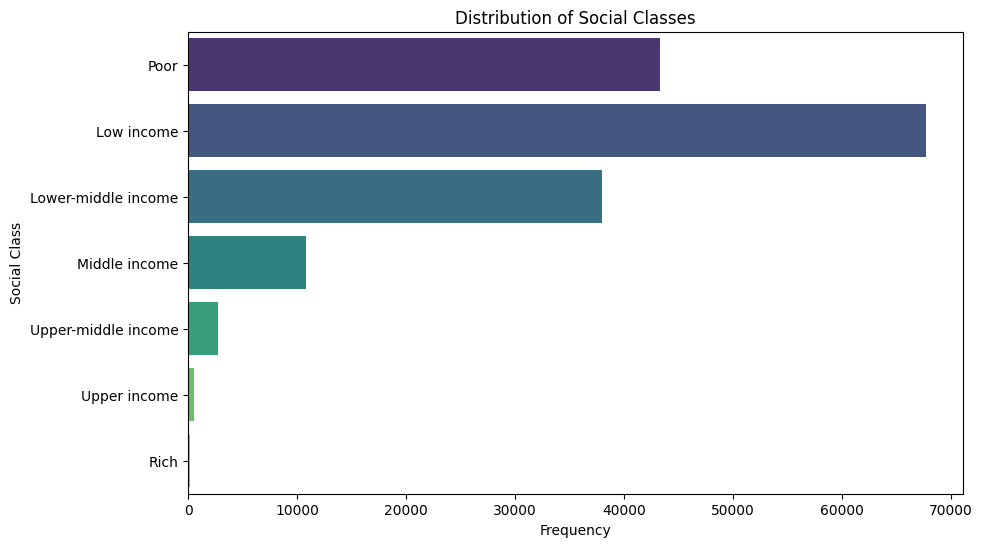

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title('Distribution of Social Classes')
plt.xlabel('Frequency')
plt.ylabel('Social Class')
plt.show()

>**Analysis**:
Majority of the households in PH are part of the low income and poor classes, indicating prevalence of poverty and other issues such as income inequality

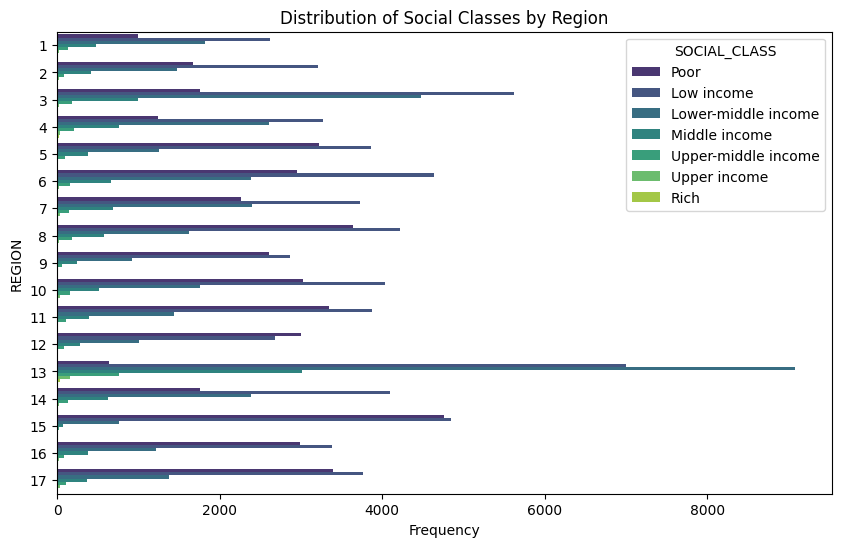

In [48]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 6))
sns.countplot(
    y="REGION",
    data=cleaned_fies,
    hue="SOCIAL_CLASS",
    palette="viridis",
    hue_order=social_class_order,
    order=sorted(cleaned_fies["REGION"].unique())
)
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

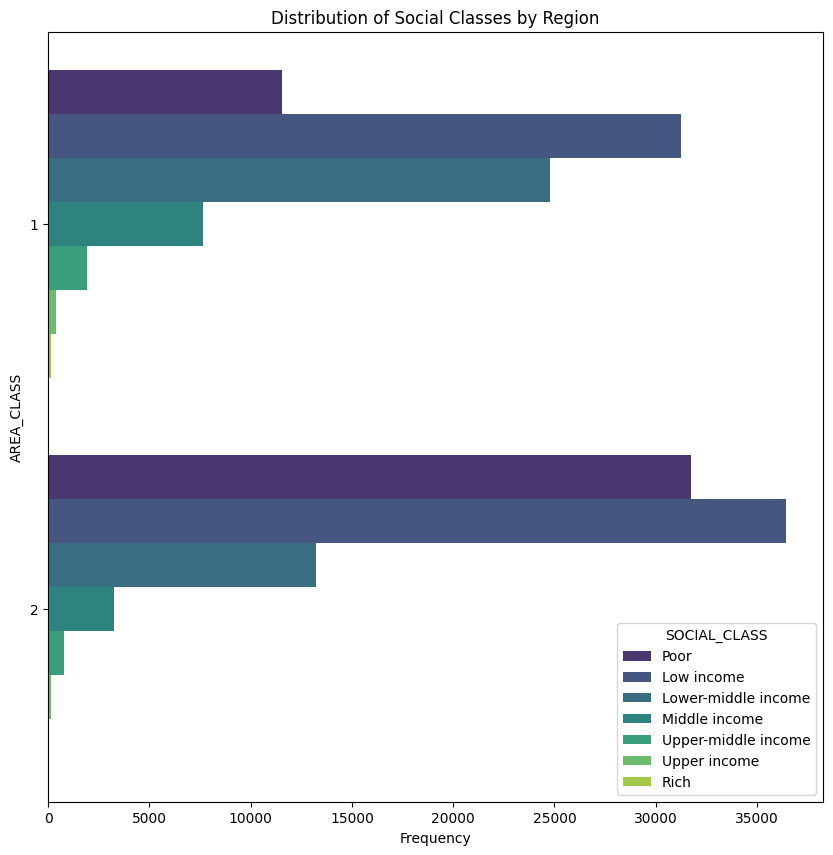

In [49]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 10))
sns.countplot(y="AREA_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", hue_order=social_class_order, palette="viridis")
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

C:\Users\Gelo\AppData\Local\Temp\ipykernel_29040\3986230746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


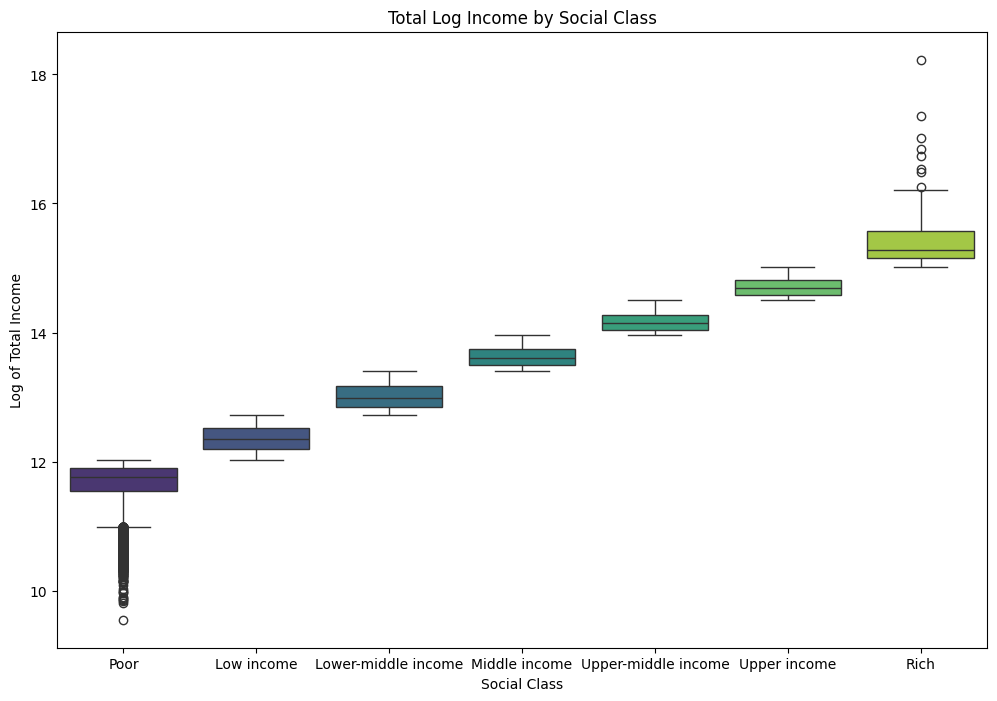

In [50]:
# Graph for Total Income by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS", y=np.log(cleaned_fies["TOTAL_INCOME"]), data=cleaned_fies, palette="viridis", order=social_class_order
)
plt.title('Total Log Income by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Log of Total Income')
plt.show()

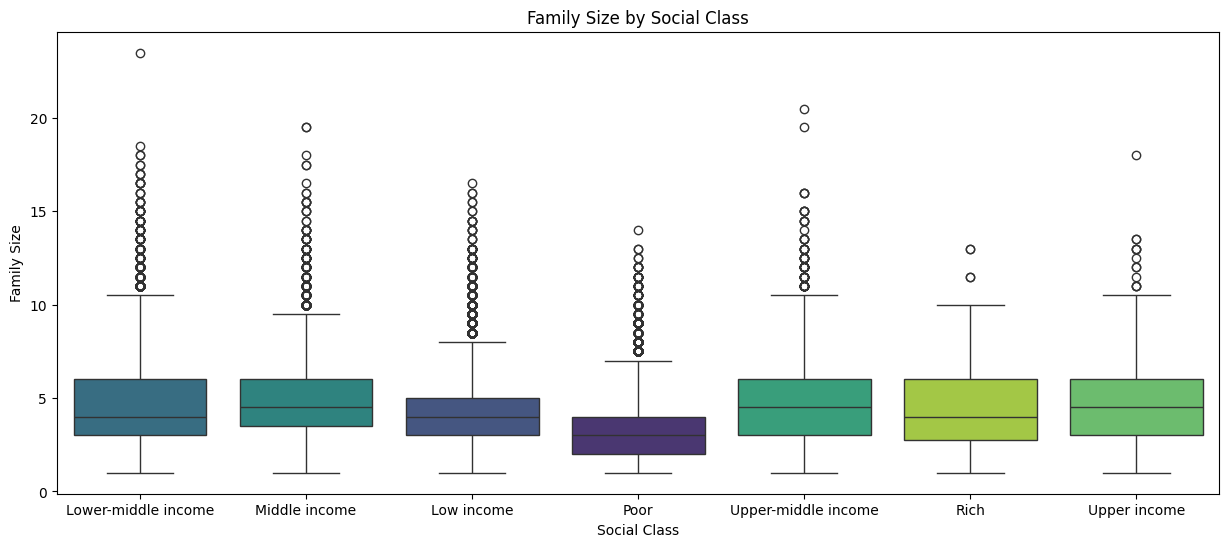

In [51]:
# Graph for Family Size by Social Class
plt.figure(figsize=(15, 6))
sns.boxplot(
    y="FAMILY_SIZE", x="SOCIAL_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", palette="viridis", legend=False, hue_order=social_class_order
)

plt.title('Family Size by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Family Size')
plt.show()
